**Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud , STOPWORDS 
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

**Importing Dataset**

In [3]:

dataset = pd.read_csv('../input/reviews/Restaurant_Reviews.tsv',delimiter='\t', quoting = 3 ) #since the file is in tabluar seperated values format
#since the dataset contains many double quotes and so to overcome the preprocessing errors we add quoting to 3 , 3 for double quotes

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**MOST USED WORDS**

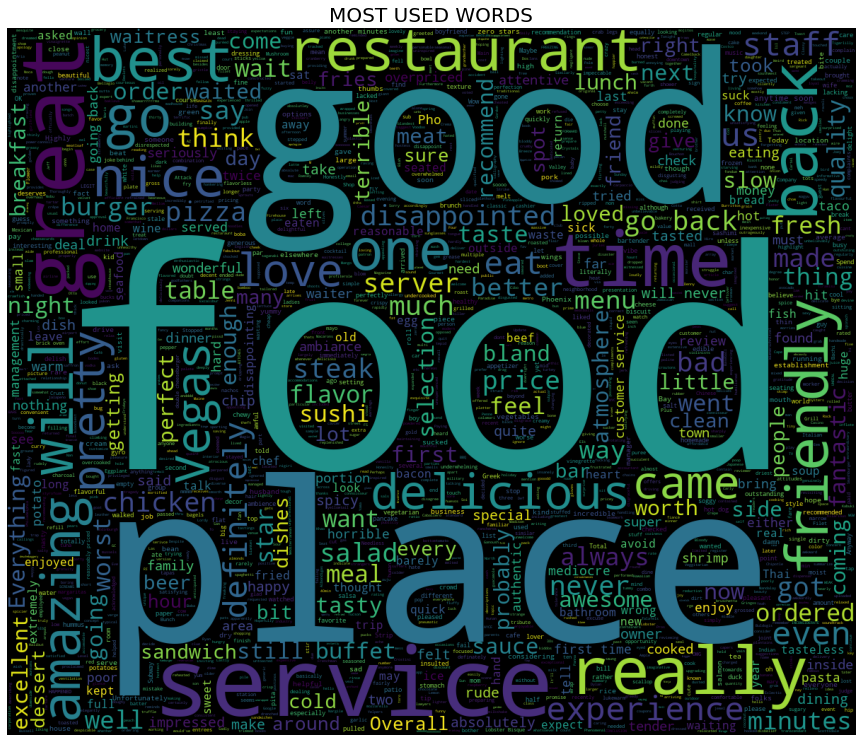

In [5]:

plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(dataset['Review']))
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()


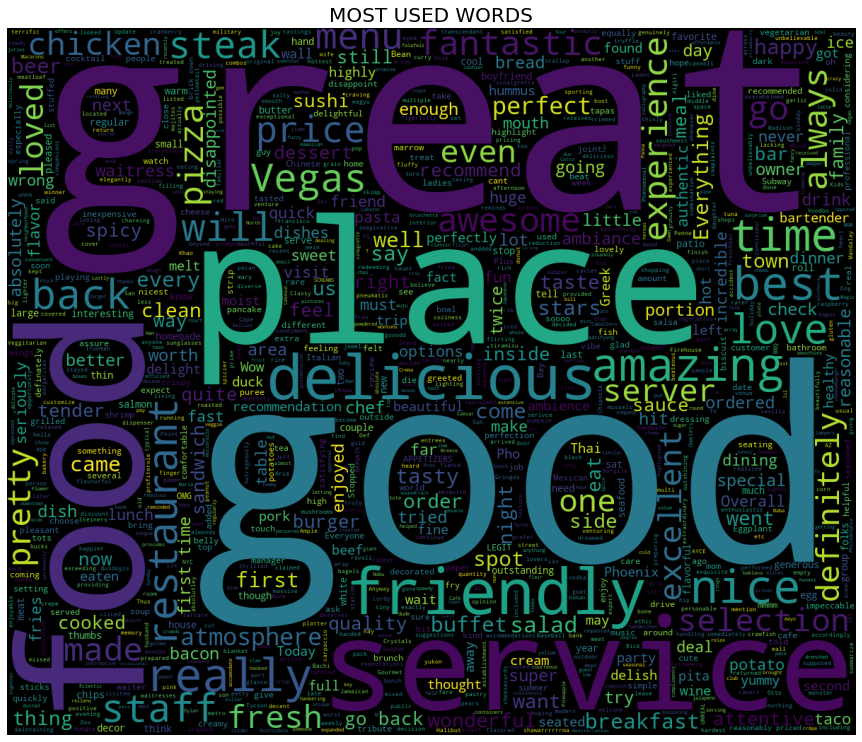

In [6]:
#Wordcloud for positive reviews

positive_reviews=dataset.loc[dataset['Liked']==1]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(positive_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

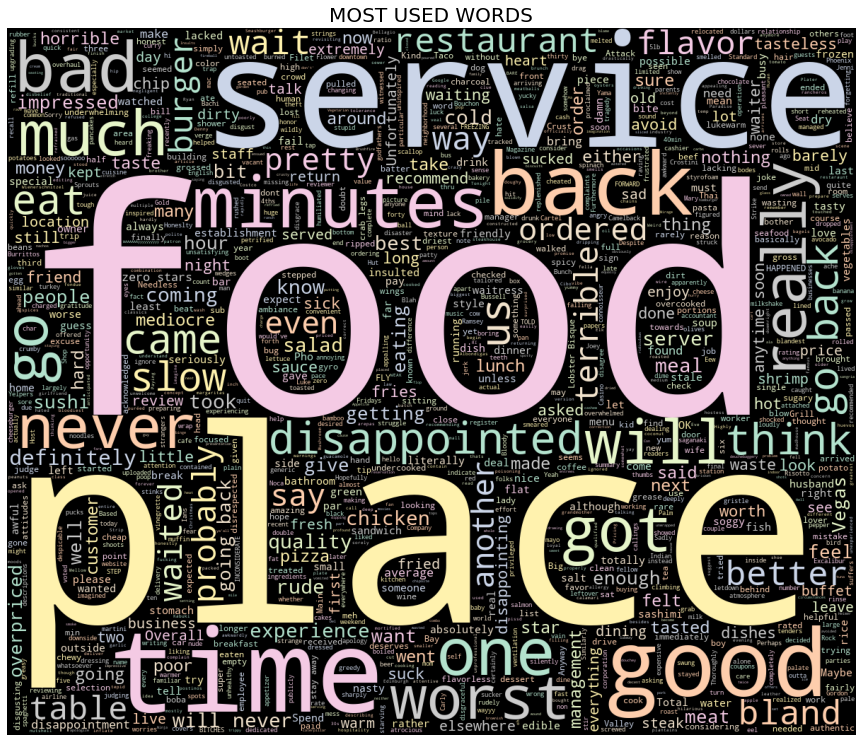

In [7]:
#Wordcloud for negative reviews

negative_reviews=dataset.loc[dataset['Liked']==0]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(negative_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Pastel2'))
plt.axis('off')
plt.show()

**Cleaning the texts**

In [8]:

import re
import nltk #for removing the stopforwards
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #this is for stemming , stemming : removing prefix,suffix,plurals,tenses such that only root word remains to get the real sense
#since we are about to use bag of words model , which creates sparse matrix for words , if it is not stemmed the child and children words have two columns making it redundant

corpus = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]' , ' ' , dataset['Review'][i])   #re.sub is used to replace any word by any word . we will use this to replace any punctuation mark by space , since if we not replace it by space then two words join
#hat operator is for not
    review=review.lower()
    review = review.split() #it splits in different words
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #applying stemming to all words in 1 review other than stopwords
    review = ' '.join(review) #joining all back to a sentence with 1 space gap 
    corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenization

In [9]:
# creating a matrix for model and the process is called as tokenization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray() #making it to 2d array since we use naive bayes model
Y = dataset.iloc[:,-1].values


In [10]:
len(X[0]) #no of elemnts in 1 row

1566

In [11]:
len(X)

1000

**Creating the bag of words model**



In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1450) #using this parameter to reduce useless words or the words that appear only few times
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:,-1].values
len(X[0])

1450

In [13]:
# train test split

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,train_size=0.8,test_size=0.2 ,random_state=0)

**Creating the model**



In [14]:
# training the model naive bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train , Y_train)


GaussianNB()

**predicting**

In [15]:

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(Y_test , y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred))

[[55 42]
 [12 91]]
0.73


**predicting a single review**

In [17]:
#positive

new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [18]:
#negative
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


In [19]:
#ambiguity case

new_review = 'I love this restaurant so much and at the same time i hate this'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


**trying out kernal-svm for better accuracy**

In [20]:
    
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)


SVC(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


**Accuracy and confusion matrix**

In [22]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(Y_test , y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred))


[[89  8]
 [36 67]]
0.78


In [23]:
#ambiguity case

new_review = 'I love this restaurant so much and at the same time i hate this'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


**Using Lemmatization instead of Stemming**

In [24]:
#Cleaning the texts

import re
import nltk #for removing the stopforwards
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #this is for stemming , stemming : removing prefix,suffix,plurals,tenses such that only root word remains to get the real sense
#since we are about to use bag of words model , which creates sparse matrix for words , if it is not stemmed the child and children words have two columns making it redundant
from nltk.stem import WordNetLemmatizer 

corpus2 = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]' , ' ' , dataset['Review'][i])   #re.sub is used to replace any word by any word . we will use this to replace any punctuation mark by space , since if we not replace it by space then two words join
#hat operator is for not
    review=review.lower()
    review = review.split() #it splits in different words
    #ps = PorterStemmer()
    ps = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.lemmatize(word) for word in review if not word in set(all_stopwords)] #applying stemming to all words in 1 review other than stopwords
    review = ' '.join(review) #joining all back to a sentence with 1 space gap 
    corpus2.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(corpus).toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Testing out multiple models**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [27]:
y = dataset.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size = 0.20, random_state = 0)

In [28]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    recall = recall_score(y_test, clf.predict(X_test).round())
    precision = precision_score(y_test, clf.predict(X_test).round())
    return clf, accuracy, recall, precision


**Models performence**

In [29]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy", "Recall", "Precision"])

models_to_evaluate = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(n_estimators=1000),
                      KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB(), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models_to_evaluate:
    clf, accuracy, recall, precision = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy,
                                                  "Recall": recall, "Precision": precision}, ignore_index=True)

model_performance

,Model,Accuracy,Recall,Precision
0,DecisionTreeClassifier(),0.730,0.650485,0.788235
1,LogisticRegression(),0.775,0.728155,0.815217
2,"(DecisionTreeClassifier(max_features='auto', r...",0.765,0.621359,0.888889
3,KNeighborsClassifier(n_neighbors=7),0.645,0.611650,0.670213
4,SVC(),0.775,0.640777,0.891892
5,GaussianNB(),0.730,0.883495,0.684211
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.700,0.446602,0.938776


**Using Multilayer Perceptron**

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV
parameter_space = {
    'hidden_layer_sizes': [(1024), (50,), (50,100, 50), (48,), (48, 48, 48), (96,), (144,), (192,), (96, 144, 192), (240,), (144, 192, 240)],
    'activation': ['tanh', 'logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.05, 0.1, 1],
    'beta_1': [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    'beta_2': [0.990, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999],
    'learning_rate': ['constant','adaptive'],
                }

In [31]:
mlp = MLPClassifier(random_state=0)


In [32]:
score = ['accuracy', 'precision']
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs = -1, n_iter = 15,  cv=3, refit='precision', scoring=score, random_state=0)

**Maximum Accuracy case**

In [33]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuracy",score*100,"%")

Accuracy 84.88372093023256 %


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


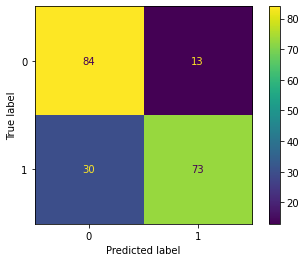

In [34]:
plot_confusion_matrix(clf, X_test, y_test)

**Understanding underlying emotions**

In [35]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 852 kB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43310 sha256=d118b0afc1ebb102bd5d7227aa943aaa0199714506f2b23f1076f79054f25bba
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [36]:
from nrclex import NRCLex
text_object = NRCLex('The food is worse')

In [37]:
emotions2 = NRCLex(" ".join(dataset['Review']))
emotions2.affect_frequencies

{'fear': 0.0353687020353687,
 'anger': 0.044711378044711377,
 'anticip': 0.0,
 'trust': 0.16182849516182848,
 'surprise': 0.05772439105772439,
 'positive': 0.2365699032365699,
 'negative': 0.09876543209876543,
 'sadness': 0.047380714047380715,
 'disgust': 0.04437771104437771,
 'joy': 0.16249582916249583,
 'anticipation': 0.11077744411077745}

In [38]:
emotions_data = pd.DataFrame(emotions2.affect_frequencies.keys(),emotions2.affect_frequencies.values())

emotions_data.columns=['Emotions']
emotions_data.head()

,Emotions
0.035369,fear
0.044711,anger
0.000000,anticip
0.161828,trust
0.057724,surprise


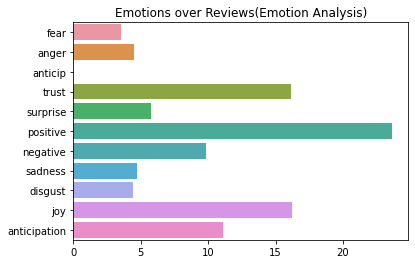

In [39]:
sns.barplot(x=emotions_data.index*100,y=emotions_data.Emotions.values)
plt.title('Emotions over Reviews(Emotion Analysis)')
plt.show()